## Modeling

In this notebook I combined the season long stats and ELO rankings from notebooks 02 and 03 into the initial NCAA data frame from kaggle and evaluated some models. The results secion at the end is where I evaluated the 2016 games for each team and then put it into the kaggle submission format to help me create my brackets

In [1]:
import pandas as pd
import numpy as np

regSeason = pd.read_csv("../raw data/RegularSeasonDetailedResults.csv")
tourney = pd.read_csv("../raw data/TourneyDetailedResults.csv")
tourneySeeds = pd.read_csv("../raw data/TourneySeeds.csv")
tourneySlots = pd.read_csv("../raw data/TourneySlots.csv")

eloStats = pd.read_csv("../derived data/eloGames.csv")
seasonStats = pd.read_csv("../derived data/seasonLongStats.csv")

In [2]:
eloStats.drop(eloStats.columns[0], axis=1, inplace=True)
seasonStats.drop(seasonStats.columns[0], axis=1, inplace=True)

In [3]:
#create two data frames: one for winning teams one for losing teams. Also add in the opposing team stats

wTeams = regSeason[['Season','Wteam','Lteam','Daynum','Wscore','Numot','Wfgm','Wfga','Wfgm3',
                    'Wfga3','Wftm','Wfta','Wor','Wdr','Wast','Wto','Wstl','Wblk','Wpf',
                    'Lscore','Lfgm','Lfga','Lfgm3','Lfga3','Lftm','Lfta','Lor','Ldr',
                    'Last','Lto','Lstl','Lblk','Lpf']]



lTeams = regSeason[['Season','Lteam','Wteam','Daynum','Lscore','Numot','Lfgm','Lfga','Lfgm3',
                    'Lfga3','Lftm','Lfta','Lor','Ldr','Last','Lto','Lstl','Lblk','Lpf',
                    'Wscore','Wfgm','Wfga','Wfgm3','Wfga3','Wftm','Wfta','Wor','Wdr',
                    'Wast','Wto','Wstl','Wblk','Wpf']]

In [4]:
wTeams['win'] = 1
lTeams['win'] = 0

In [5]:
wTeams.columns = ['season','team','opp','daynum','score','numot','fgm','fga','fgm3',
                  'fga3','ftm','fta','or','dr','ast','to','stl','blk','pf',
                  'opp_score','opp_fgm','opp_fga','opp_fgm3','opp_fga3','opp_ftm',
                  'opp_fta','opp_or','opp_dr','opp_ast','opp_to','opp_stl',
                  'opp_blk', 'opp_pf', 'win']

lTeams.columns = ['season','team','opp','daynum','score','numot','fgm','fga','fgm3',
                  'fga3','ftm','fta','or','dr','ast','to','stl','blk','pf',
                  'opp_score','opp_fgm','opp_fga','opp_fgm3','opp_fga3','opp_ftm',
                  'opp_fta','opp_or','opp_dr','opp_ast','opp_to','opp_stl',
                  'opp_blk', 'opp_pf', 'win']

In [6]:
regularSeason = wTeams.append(lTeams)

In [7]:
print regularSeason.columns

Index([u'season', u'team', u'opp', u'daynum', u'score', u'numot', u'fgm',
       u'fga', u'fgm3', u'fga3', u'ftm', u'fta', u'or', u'dr', u'ast', u'to',
       u'stl', u'blk', u'pf', u'opp_score', u'opp_fgm', u'opp_fga',
       u'opp_fgm3', u'opp_fga3', u'opp_ftm', u'opp_fta', u'opp_or', u'opp_dr',
       u'opp_ast', u'opp_to', u'opp_stl', u'opp_blk', u'opp_pf', u'win'],
      dtype='object')


In [8]:
regularSeason = regularSeason[['season','daynum','team','opp','win']]

In [9]:
print(seasonStats.columns)

Index([u'season', u'team', u'opp_toAvg', u'opp_scoreAvg', u'opp_orAvg',
       u'toAvg', u'opp_stlAvg', u'scoreAvg', u'pfAvg', u'blkAvg', u'astAvg',
       u'opp_astAvg', u'opp_drAvg', u'drAvg', u'opp_blkAvg', u'stlAvg',
       u'opp_pfAvg', u'orAvg', u'fgp', u'fg3p', u'ftp', u'opp_fgp',
       u'opp_fg3p', u'opp_ftp', u'OffRating', u'DefRating'],
      dtype='object')


In [10]:
df = pd.merge(regularSeason, seasonStats[['season', 'team', 'toAvg','scoreAvg', 'pfAvg', 'blkAvg', 'astAvg', 'drAvg',
'stlAvg', 'orAvg', 'fgp', 'fg3p', 'ftp', 'OffRating', 'DefRating']],  how='left',
              left_on=['season','team'], right_on = ['season','team'])

In [11]:
df = pd.merge(df, seasonStats[['season', 'team', 'toAvg','scoreAvg', 'pfAvg', 'blkAvg', 'astAvg', 'drAvg',
'stlAvg', 'orAvg', 'fgp', 'fg3p', 'ftp', 'OffRating', 'DefRating']],  how='left',
              left_on=['season','opp'], right_on = ['season','team'])

In [12]:
print df.columns

Index([u'season', u'daynum', u'team_x', u'opp', u'win', u'toAvg_x',
       u'scoreAvg_x', u'pfAvg_x', u'blkAvg_x', u'astAvg_x', u'drAvg_x',
       u'stlAvg_x', u'orAvg_x', u'fgp_x', u'fg3p_x', u'ftp_x', u'OffRating_x',
       u'DefRating_x', u'team_y', u'toAvg_y', u'scoreAvg_y', u'pfAvg_y',
       u'blkAvg_y', u'astAvg_y', u'drAvg_y', u'stlAvg_y', u'orAvg_y', u'fgp_y',
       u'fg3p_y', u'ftp_y', u'OffRating_y', u'DefRating_y'],
      dtype='object')


In [13]:
df['toDif'] = df['toAvg_x'] - df['toAvg_y']
df['scoreDif'] = df['scoreAvg_x'] - df['scoreAvg_y']
df['pfDif'] = df['pfAvg_x'] - df['pfAvg_y']
df['blkDif'] = df['blkAvg_x'] - df['blkAvg_y']
df['astDif'] = df['astAvg_x'] - df['astAvg_y']
df['drDif'] = df['drAvg_x'] - df['drAvg_y']
df['stlDif'] = df['stlAvg_x'] - df['stlAvg_y']
df['orDif'] = df['orAvg_x'] - df['orAvg_y']
df['fgpDif'] = df['fgp_x'] - df['fgp_y']
df['fg3pDif'] = df['fg3p_x'] - df['fg3p_y']
df['ftpDif'] = df['ftp_x'] - df['ftp_y']
df['offRatDif'] = df['OffRating_x'] - df['OffRating_y']
df['defRatDif'] = df['DefRating_x'] - df['DefRating_y']

In [14]:
df.drop(['toAvg_x',
       'scoreAvg_x', 'pfAvg_x', 'blkAvg_x', 'astAvg_x', 'drAvg_x',
       'stlAvg_x', 'orAvg_x', 'fgp_x', 'fg3p_x', 'ftp_x', 'OffRating_x',
       'DefRating_x', 'team_y', 'toAvg_y', 'scoreAvg_y', 'pfAvg_y',
       'blkAvg_y', 'astAvg_y', 'drAvg_y', 'stlAvg_y', 'orAvg_y', 'fgp_y',
       'fg3p_y', 'ftp_y', 'OffRating_y', 'DefRating_y'], axis = 1, inplace = True)

In [15]:
df.head()

,season,daynum,team_x,opp,win,toDif,scoreDif,pfDif,blkDif,astDif,drDif,stlDif,orDif,fgpDif,fg3pDif,ftpDif,offRatDif,defRatDif
0,2003,10,1104,1328,1,1.485714,-1.880952,-0.564286,0.019048,-2.059524,-1.038095,-0.326190,1.438095,-0.026572,-0.073529,0.002012,-4.920202,5.754161
1,2003,10,1272,1393,1,0.172414,-5.586207,2.172414,-2.206897,1.655172,-0.931034,-0.931034,-0.241379,-0.032135,0.018362,-0.039816,-5.021639,-3.275287
2,2003,11,1266,1437,1,-2.461905,6.192857,-2.257143,0.242857,3.254762,0.371429,-1.500000,-1.592857,0.063381,0.030351,0.057471,15.011565,1.507850
3,2003,11,1296,1457,1,2.357143,0.184332,0.163594,-1.779954,0.070276,-1.319124,0.005760,0.964286,0.026860,0.031417,0.016976,2.201253,7.052977
4,2003,11,1400,1208,1,1.873016,-0.328042,3.171958,-0.513228,-3.425926,1.550265,-1.236772,3.363757,-0.015622,-0.031316,0.000674,-0.932269,-6.216110


In [16]:
df.rename(columns={'team_x':'team'}, inplace=True)

In [17]:
eloStats.head()

,Season,Daynum,Wteam,Lteam,w_elo_before_game,w_elo_after_game,l_elo_before_game,l_elo_after_game,total_days
0,1985,20,1228,1328,1500,1532,1500,1468,1846.25
1,1985,25,1106,1354,1500,1532,1500,1468,1851.25
2,1985,25,1112,1223,1500,1532,1500,1468,1851.25
3,1985,25,1165,1432,1500,1532,1500,1468,1851.25
4,1985,25,1192,1447,1500,1532,1500,1468,1851.25


In [18]:
eloWin = eloStats[['Season', 'Daynum', 'Wteam', 'w_elo_before_game']]
eloLose = eloStats[['Season', 'Daynum', 'Lteam', 'l_elo_before_game']]

In [19]:
eloWin.columns = ['season','daynum','team','elo']
eloLose.columns = ['season','daynum','team','elo']

In [20]:
eloTotals = eloWin.append(eloLose)

In [21]:
df = pd.merge(df, eloTotals,  how='left',
              left_on=['season','daynum','team'], right_on = ['season','daynum','team'])

In [22]:
df = pd.merge(df, eloTotals,  how='left',
              left_on=['season','daynum','opp'], right_on = ['season','daynum','team'])

In [23]:
print df.columns

Index([u'season', u'daynum', u'team_x', u'opp', u'win', u'toDif', u'scoreDif',
       u'pfDif', u'blkDif', u'astDif', u'drDif', u'stlDif', u'orDif',
       u'fgpDif', u'fg3pDif', u'ftpDif', u'offRatDif', u'defRatDif', u'elo_x',
       u'team_y', u'elo_y'],
      dtype='object')


In [24]:
df.drop('team_y', axis = 1, inplace = True)

In [25]:
df['eloDif'] = df['elo_x'] - df['elo_y']

In [26]:
print df.columns

Index([u'season', u'daynum', u'team_x', u'opp', u'win', u'toDif', u'scoreDif',
       u'pfDif', u'blkDif', u'astDif', u'drDif', u'stlDif', u'orDif',
       u'fgpDif', u'fg3pDif', u'ftpDif', u'offRatDif', u'defRatDif', u'elo_x',
       u'elo_y', u'eloDif'],
      dtype='object')


## MODELING TIME!

In [27]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(df[['toDif', 'scoreDif', 'pfDif', 'blkDif', 'astDif',
                                                           'drDif', 'stlDif', 'orDif', 'fgpDif', 'fg3pDif',
                                                           'ftpDif', 'offRatDif', 'defRatDif','eloDif']]
                                                       , df['win'], test_size=0.2, random_state=42)

## Logistic Regression

In [28]:
#Start with a vanilla regressor
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression

lr = ms.GridSearchCV(estimator=LogisticRegression(class_weight = 'balanced', penalty = 'l1'),
                                  param_grid={'C': range(11,15,1)},
                                  scoring='neg_log_loss'
)

lr.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [11, 12, 13, 14]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='neg_log_loss',
       verbose=0)

In [29]:
print(lr.best_score_)
print(lr.best_params_)

-0.523373663665
{'C': 12}


Standard Logistic regression can get me to 0.52337282409

In [30]:
from sklearn.metrics import log_loss

predicted = lr.predict_proba(X_test)[:, 1]
log_loss(y_test, predicted)

0.51719503266693378

## Lasso Path

<IPython.core.display.Javascript object>


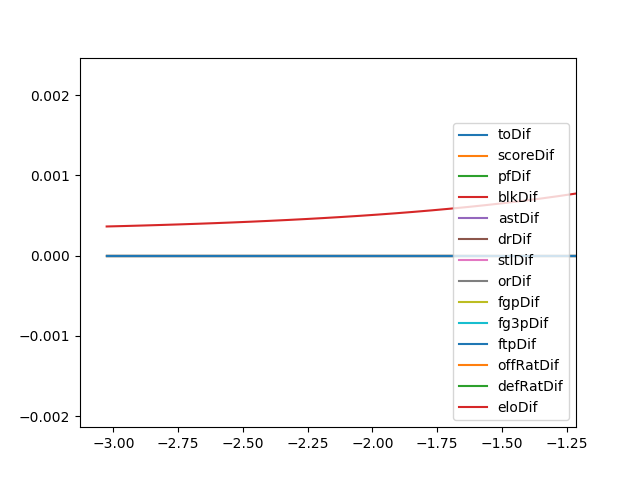

In [31]:
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

%matplotlib notebook
alpha, coef, _ = lm.lasso_path(X_train, y_train)
for i in range(14):
    plt.plot(np.log(alpha), coef[i, :], label=X_train.columns[i])
plt.legend(loc='lower right')

## XGBoost

In [37]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

#xgbmodel = ms.GridSearchCV(XGBClassifier(n_estimators=58,max_depth=3, min_child_weight=2,
#                                        gamma = 0, colsample_bytree=0.8),
#                           param_grid={'subsample': np.arange(0.8, 1, 0.1)},
#                           scoring='neg_log_loss',
#                           n_jobs = -1,
#                          verbose = 3)

xgbmodel = XGBClassifier(n_estimators=58,max_depth=3, min_child_weight=2, gamma = 0,
                        subsample=0.8, colsample_bytree=0.8)

xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=2, missing=None, n_estimators=58, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [33]:
print(xgbmodel.best_score_)

-0.524883688194


In [36]:
print(xgbmodel.best_params_)

{'subsample': 0.80000000000000004}


XGBoost looks like it can get me to -0.524869145553

In [38]:
xgpredicted = xgbmodel.predict_proba(X_test)[:, 1]
log_loss(y_test, xgpredicted)

0.51858196517147159

In [41]:
# plot feature importance
def get_xgb_imp(xgb, feat_names):
    from numpy import array
    imp_vals = xgb.booster().get_fscore()
    imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
    total = array(imp_dict.values()).sum()
    return {k:v/total for k,v in imp_dict.items()}

In [42]:
get_xgb_imp(xgbmodel,X_train.columns)

C:\Users\whinesjr\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


{'astDif': nan,
 'blkDif': nan,
 'defRatDif': nan,
 'drDif': nan,
 'eloDif': nan,
 'fg3pDif': nan,
 'fgpDif': nan,
 'ftpDif': nan,
 'offRatDif': nan,
 'orDif': nan,
 'pfDif': nan,
 'scoreDif': nan,
 'stlDif': nan,
 'toDif': nan}

## Descision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

#treeModel = ms.GridSearchCV(DecisionTreeClassifier(),
#                            {'max_depth': range(2, 10, 1),
#                             'min_samples_leaf': range(5, 25, 5)},
#                            scoring='neg_log_loss',
#                            verbose = 3,
#                            n_jobs = -1)

treeModel = DecisionTreeClassifier(max_depth= 6, min_samples_leaf= 20)

treeModel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [164]:
print(treeModel.best_score_)
print(treeModel.best_params_)

-0.534390103677
{'max_depth': 6, 'min_samples_leaf': 20}


A decision tree can get to 0.534390103677

In [44]:
DTpredicted = treeModel.predict_proba(X_test)[:, 1]
log_loss(y_test, DTpredicted)

0.52786852542045226

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

forestModel=ms.GridSearchCV(RandomForestClassifier(),
                     {'n_estimators': range(150, 201, 25)},#,
                      #'max_depth': range(2, 20, 2),
                      #'min_samples_leaf': range(10, 25, 5),
                      #'max_features': range(2, 4)},
                     scoring='neg_log_loss',
                           verbose = 3,
                           n_jobs = -1)
forestModel.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  4.3min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  6.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [150, 175, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=3)

In [47]:
print(forestModel.best_score_)
print(forestModel.best_params_)

-0.566788854132
{'n_estimators': 200}


In [48]:
RFpredicted = forestModel.predict_proba(X_test)[:, 1]
log_loss(y_test, RFpredicted)

0.57887464197223359

## RESULTS

These are the results for all possible 2016 combinations. At the end I put them into the official Kaggle submission format so I could use a script I found to output tournament results

In [249]:
import itertools
games =  pd.DataFrame(list(itertools.combinations(tourneySeeds.loc[(tourneySeeds['Season'] == 2016)]['Team'], 2)))

In [250]:
games['season'] = 2016

In [251]:
games.columns = ['team','opp','season']

In [252]:
games = pd.merge(games, seasonStats[['season', 'team', 'toAvg','scoreAvg', 'pfAvg', 'blkAvg', 'astAvg', 'drAvg',
'stlAvg', 'orAvg', 'fgp', 'fg3p', 'ftp', 'OffRating', 'DefRating']],  how='left',
              left_on=['season','team'], right_on = ['season','team'])

In [253]:
games = pd.merge(games, seasonStats[['season', 'team', 'toAvg','scoreAvg', 'pfAvg', 'blkAvg', 'astAvg', 'drAvg',
'stlAvg', 'orAvg', 'fgp', 'fg3p', 'ftp', 'OffRating', 'DefRating']],  how='left',
              left_on=['season','opp'], right_on = ['season','team'])

In [254]:
games['toDif'] = games['toAvg_x'] - games['toAvg_y']
games['scoreDif'] = games['scoreAvg_x'] - games['scoreAvg_y']
games['pfDif'] = games['pfAvg_x'] - games['pfAvg_y']
games['blkDif'] = games['blkAvg_x'] - games['blkAvg_y']
games['astDif'] = games['astAvg_x'] - games['astAvg_y']
games['drDif'] = games['drAvg_x'] - games['drAvg_y']
games['stlDif'] = games['stlAvg_x'] - games['stlAvg_y']
games['orDif'] = games['orAvg_x'] - games['orAvg_y']
games['fgpDif'] = games['fgp_x'] - games['fgp_y']
games['fg3pDif'] = games['fg3p_x'] - games['fg3p_y']
games['ftpDif'] = games['ftp_x'] - games['ftp_y']
games['offRatDif'] = games['OffRating_x'] - games['OffRating_y']
games['defRatDif'] = games['DefRating_x'] - games['DefRating_y']

In [255]:
games.drop(['toAvg_x',
       'scoreAvg_x', 'pfAvg_x', 'blkAvg_x', 'astAvg_x', 'drAvg_x',
       'stlAvg_x', 'orAvg_x', 'fgp_x', 'fg3p_x', 'ftp_x', 'OffRating_x',
       'DefRating_x', 'team_y', 'toAvg_y', 'scoreAvg_y', 'pfAvg_y',
       'blkAvg_y', 'astAvg_y', 'drAvg_y', 'stlAvg_y', 'orAvg_y', 'fgp_y',
       'fg3p_y', 'ftp_y', 'OffRating_y', 'DefRating_y'], axis = 1, inplace = True)

In [256]:
games.rename(columns={'team_x':'team'}, inplace=True)

In [257]:
games.head()

,team,opp,season,toDif,scoreDif,pfDif,blkDif,astDif,drDif,stlDif,orDif,fgpDif,fg3pDif,ftpDif,offRatDif,defRatDif
0,1314,1462,2016,-1.838235,0.920956,-2.275735,1.319853,1.742647,-0.996324,-0.430147,0.966912,0.026726,-0.047713,0.006819,4.878343,1.503181
1,1314,1452,2016,-3.088235,3.058824,-5.470588,1.852941,3.352941,3.676471,-3.058824,-1.882353,0.026543,-0.014655,0.067747,5.768766,4.882659
2,1314,1246,2016,-0.088235,2.588235,-2.558824,-1.264706,3.705882,1.235294,1.264706,1.147059,0.000177,-0.056593,0.054191,0.706771,0.064546
3,1314,1231,2016,-2.744485,-0.016544,-0.275735,0.413603,2.148897,1.597426,-0.055147,1.998162,-0.022335,-0.100805,0.014561,-2.203306,-1.027679
4,1314,1323,2016,1.193015,6.545956,2.411765,0.476103,4.648897,1.784926,1.288603,3.123162,0.007480,-0.055023,0.002295,1.365835,-8.436242


In [258]:
finalELO = eloTotals.groupby(['season','team'], as_index = False).agg({'daynum': max})

In [259]:
finalELO = pd.merge(finalELO, eloTotals, how='left', left_on=['season','daynum','team'],
                 right_on=['season','daynum','team'])

In [260]:
finalELO.head()

,season,team,daynum,elo
0,1985,1102,127,1361
1,1985,1103,119,1433
2,1985,1104,144,1771
3,1985,1106,126,1394
4,1985,1108,131,1705


In [261]:
games = pd.merge(games, finalELO,  how='left',
              left_on=['season','team'], right_on = ['season','team'])

In [262]:
games = pd.merge(games, finalELO,  how='left',
              left_on=['season','opp'], right_on = ['season','team'])

In [263]:
games['eloDif'] = games['elo_x'] - games['elo_y']

In [264]:
games.head()

,team_x,opp,season,toDif,scoreDif,pfDif,blkDif,astDif,drDif,stlDif,...,fg3pDif,ftpDif,offRatDif,defRatDif,daynum_x,elo_x,team_y,daynum_y,elo_y,eloDif
0,1314,1462,2016,-1.838235,0.920956,-2.275735,1.319853,1.742647,-0.996324,-0.430147,...,-0.047713,0.006819,4.878343,1.503181,154,2075,1462,139,1922,153
1,1314,1452,2016,-3.088235,3.058824,-5.470588,1.852941,3.352941,3.676471,-3.058824,...,-0.014655,0.067747,5.768766,4.882659,154,2075,1452,137,1911,164
2,1314,1246,2016,-0.088235,2.588235,-2.558824,-1.264706,3.705882,1.235294,1.264706,...,-0.056593,0.054191,0.706771,0.064546,154,2075,1246,138,1943,132
3,1314,1231,2016,-2.744485,-0.016544,-0.275735,0.413603,2.148897,1.597426,-0.055147,...,-0.100805,0.014561,-2.203306,-1.027679,154,2075,1231,144,1920,155
4,1314,1323,2016,1.193015,6.545956,2.411765,0.476103,4.648897,1.784926,1.288603,...,-0.055023,0.002295,1.365835,-8.436242,154,2075,1323,146,1899,176


In [265]:
predicted = lr.predict_proba(games[['toDif', 'scoreDif', 'pfDif', 'blkDif', 'astDif','drDif',
                                    'stlDif', 'orDif', 'fgpDif', 'fg3pDif','ftpDif',
                                    'offRatDif', 'defRatDif','eloDif']])[:, 1]  

In [266]:
predicted

array([ 0.68279512,  0.67688102,  0.57592936, ...,  0.87657718,
        0.76636709,  0.31662767])

In [267]:
games['predicted'] = predicted

In [268]:
games.head()

,team_x,opp,season,toDif,scoreDif,pfDif,blkDif,astDif,drDif,stlDif,...,ftpDif,offRatDif,defRatDif,daynum_x,elo_x,team_y,daynum_y,elo_y,eloDif,predicted
0,1314,1462,2016,-1.838235,0.920956,-2.275735,1.319853,1.742647,-0.996324,-0.430147,...,0.006819,4.878343,1.503181,154,2075,1462,139,1922,153,0.682795
1,1314,1452,2016,-3.088235,3.058824,-5.470588,1.852941,3.352941,3.676471,-3.058824,...,0.067747,5.768766,4.882659,154,2075,1452,137,1911,164,0.676881
2,1314,1246,2016,-0.088235,2.588235,-2.558824,-1.264706,3.705882,1.235294,1.264706,...,0.054191,0.706771,0.064546,154,2075,1246,138,1943,132,0.575929
3,1314,1231,2016,-2.744485,-0.016544,-0.275735,0.413603,2.148897,1.597426,-0.055147,...,0.014561,-2.203306,-1.027679,154,2075,1231,144,1920,155,0.570473
4,1314,1323,2016,1.193015,6.545956,2.411765,0.476103,4.648897,1.784926,1.288603,...,0.002295,1.365835,-8.436242,154,2075,1323,146,1899,176,0.748968


In [269]:
games.to_csv("../derived data/2016Games.csv")

In [238]:
submissions = games

In [241]:
submissions['Id'] = submissions['season'].astype(str).str.cat(submissions['team_x'].astype(str), sep='_')

In [247]:
submissions.head()

,Id,Pred
0,2016_1314_1462,0.682795
1,2016_1314_1452,0.676881
2,2016_1314_1246,0.575929
3,2016_1314_1231,0.570473
4,2016_1314_1323,0.748968


In [243]:
submissions['Id'] = submissions['Id'].astype(str).str.cat(submissions['opp'].astype(str), sep='_')

In [245]:
submissions = submissions[['Id', 'predicted']]

In [246]:
submissions.rename(columns={'predicted':'Pred'}, inplace=True)

//anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [270]:
submissions.to_csv("../derived data/2016submission.csv", index=False)